# Analysis of WHO API Data for MPOWER Indicators

Website references:

https://tobaccocontrol.bmj.com/content/24/6/540?ijkey=bd2ac5d338d281ed48f406cb7d0d621f9cd766ab&keytype2=tf_ipsecsha#ref-2
https://iris.who.int/bitstream/handle/10665/348537/9789240039322-eng.pdf?sequence=1
https://iris.who.int/bitstream/handle/10665/372043/9789240077164-eng.pdf?sequence=1
https://iris.who.int/bitstream/handle/10665/343287/9789240032095-eng.pdf?sequence=1&isAllowed=y

### Use API to retrieve smoking prevelance rate in each country
Calculate changes in smoking rates between 2000 and 2022:

In [1]:
import requests as requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests as requests
from functools import reduce

In [2]:
# Get API from the WHO - estimate of smoking prevalence (%)
url = "https://ghoapi.azureedge.net/api/M_Est_tob_curr"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_data_rate = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")


Data was retrieved


In [3]:
# Create a dataframe for 2000
index = []
value = []
time = []

for i in json_data_rate["value"]:
    if i["TimeDimensionValue"] == "2000" and i["Dim1"] == "SEX_BTSX":
        index.append(i["SpatialDim"])
        value.append(i["NumericValue"])
        time.append(i['TimeDimensionValue'])
data = list(zip(value))
label = ["Rate 2000"]
dfrate2000 = pd.DataFrame(data, index = index, columns = label)
dfrate2000.index.name = "Code"

In [4]:
# Create a dataframe for 2022
index = []
value = []
time = []


for i in json_data_rate["value"]:
    if i["TimeDimensionValue"] == "2022" and i["Dim1"] == "SEX_BTSX":
        index.append(i["SpatialDim"])
        value.append(i["NumericValue"])
        time.append(i['TimeDimensionValue'])
data = list(zip(value))
label = ["Rate 2022"]
dfrate2022 = pd.DataFrame(data, index = index, columns = label)
dfrate2022.index.name = "Code"

In [5]:
# Merge the data sets
df_rate_change = pd.merge(dfrate2022, dfrate2000, left_index=True, right_index=True, how='outer')

# Change data types to float to perform calculations on
df_rate_change = df_rate_change[["Rate 2022", "Rate 2000"]].astype(float)
df_rate_change["Change Rate"] = ((df_rate_change["Rate 2022"] - df_rate_change["Rate 2000"]))


In [6]:
# Get API from the WHO - Monitor tobacco use and prevention policies level
url = "https://ghoapi.azureedge.net/api/M_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_data_control_agency = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2007":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["M2007"]
df_M_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_M_2007.index.name = "Code"
df_M_2007 = df_M_2007[["M2007"]].astype(float)

# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["M2020"]
df_M_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_M_2020.index.name = "Code"
df_M_2020 = df_M_2020[["M2020"]].astype(float)


# Merge the data sets
df_M_merge = pd.merge(df_M_2020, df_M_2007, left_index=True, right_index=True, how='outer')
# Change data types to float to perform calculations on
df_M_merge = df_M_merge[["M2020", "M2007"]].astype(float)
df_M_merge["Change M"] = (df_M_merge["M2020"] - df_M_merge["M2007"])

Data was retrieved


In [7]:
# Get API from the WHO - Protect people from tobacco smoke level
url = "https://ghoapi.azureedge.net/api/P_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_data_control_agency = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2007":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["P2007"]
df_P_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_P_2007.index.name = "Code"
df_P_2007 = df_P_2007[["P2007"]].astype(float)

# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["P2020"]
df_P_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_P_2020.index.name = "Code"
df_P_2020 = df_P_2020[["P2020"]].astype(float)

# Merge the data sets
df_P_merge = pd.merge(df_P_2020, df_P_2007, left_index=True, right_index=True, how='outer')

# Change data types to float to perform calculations on
df_P_merge = df_P_merge[["P2020", "P2007"]].astype(float)
df_P_merge["Change P"] = (df_P_merge["P2020"] - df_P_merge["P2007"])


Data was retrieved


In [8]:
 
# Get API from the WHO - Offer help to quit tobacco use
url = "https://ghoapi.azureedge.net/api/O_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_data_control_agency = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2007":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["O2007"]
df_O_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_O_2007.index.name = "Code"
df_O_2007 = df_O_2007[["O2007"]].astype(float)

# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_data_control_agency["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["O2020"]
df_O_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_O_2020.index.name = "Code"
df_O_2020 = df_O_2020[["O2020"]].astype(float)

# Merge the data sets
df_O_merge = pd.merge(df_O_2020, df_O_2007, left_index=True, right_index=True, how='outer')

# Change data types to float to perform calculations on
df_O_merge = df_O_merge[["O2020", "O2007"]].astype(float)
df_O_merge["Change O"] = (df_O_merge["O2020"] - df_O_merge["O2007"])


Data was retrieved


In [9]:
# Get API from the WHO - Warn about the dangers of tobacco
url = "https://ghoapi.azureedge.net/api/W_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_W_group = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

for i in json_W_group["value"]:
    if i["TimeDimensionValue"] == "2007":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["W2007"]
df_W_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_W_2007.index.name = "Code"
df_W_2007 = df_W_2007[["W2007"]].astype(float)

# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_W_group["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["W2020"]
df_W_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_W_2020.index.name = "Code"
df_W_2020 = df_W_2020[["W2020"]].astype(float)

# Merge the data sets
df_W_merge = pd.merge(df_W_2020, df_W_2007, left_index=True, right_index=True, how='outer')
# Change data types to float to perform calculations on
df_W_merge = df_W_merge[["W2020", "W2007"]].astype(float)
df_W_merge["Change W"] = (df_W_merge["W2020"] - df_W_merge["W2007"])

Data was retrieved


In [10]:
# Get API from the WHO - Enforce bans on tobacco advertising, promotion and sponsorship
url = "https://ghoapi.azureedge.net/api/E_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_E_group = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

for i in json_E_group["value"]:
    if i["TimeDimensionValue"] == "2007":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["E2007"]
df_E_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_E_2007.index.name = "Code"
df_E_2007 = df_E_2007[["E2007"]].astype(float)

# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_E_group["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["E2020"]
df_E_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_E_2020.index.name = "Code"
df_E_2020 = df_E_2020[["E2020"]].astype(float)

# Merge the data sets
df_E_merge = pd.merge(df_E_2020, df_E_2007, left_index=True, right_index=True, how='outer')
# Change data types to float to perform calculations on
df_E_merge = df_E_merge[["E2020", "E2007"]].astype(float)
df_E_merge["Change E"] = (df_E_merge["E2020"] - df_E_merge["E2007"])

Data was retrieved


In [11]:
# Get API from the WHO - Raise taxes on tobacco
url = "https://ghoapi.azureedge.net/api/R_Group"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_R_group = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe for 2007
index2007 = []
value2007 = []

# Note 2007 data not avaliable
for i in json_R_group["value"]:
    if i["TimeDimensionValue"] == "2008":
        index2007.append(i["SpatialDim"])
        value2007.append(i["Value"])

data = list(zip(value2007))
label = ["R2007"]
df_R_2007 = pd.DataFrame(data, index = index2007, columns = label)
df_R_2007.index.name = "Code"
df_R_2007 = df_R_2007.replace("Not applicable", "0")
df_R_2007 = df_R_2007[["R2007"]].astype(float)


# Create a dataframe for 2020
index2020 = []
value2020 = []

for i in json_R_group["value"]:
    if i["TimeDimensionValue"] == "2020":
        index2020.append(i["SpatialDim"])
        value2020.append(i["Value"])

data = list(zip(value2020))
label = ["R2020"]
df_R_2020 = pd.DataFrame(data, index = index2020, columns = label)
df_R_2020.index.name = "Code"
df_R_2020 = df_R_2020.replace("Not applicable", "0")
df_R_2020 = df_R_2020[["R2020"]].astype(float)

# Merge the data sets
df_R_merge = pd.merge(df_R_2020, df_R_2007, left_index=True, right_index=True, how='outer')

# Change data types to float to perform calculations on
df_R_merge = df_R_merge[["R2020", "R2007"]].astype(float)
df_R_merge["Change R"] = (df_R_merge["R2020"] - df_R_merge["R2007"])


Data was retrieved


In [12]:
# Import list of countries from csv

csv_data = pd.read_csv("/Users/rhonabaker/CFG/GROUP PROJECT/GitHub/GitHub repository/WHO API/WHO_country_list.csv")

country_list = pd.DataFrame(csv_data)
country_list.set_index("Code", inplace = True)
country_list

,Country
Code,
AFG,Afghanistan
ALB,Albania
DZA,Algeria
AND,Andorra
AGO,Angola
...,...
SSD,South Sudan
SDF,Sudan (former)
CHI,Channel islands


In [13]:
import pandas as pd
from functools import reduce

# Merge data into a combined DataFrame
data_frames = [country_list, df_rate_change, df_M_merge, df_P_merge, df_O_merge, df_W_merge, df_E_merge, df_R_merge]

merged_data_frames = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, left_index=True, right_index=True, how='outer'), data_frames)
merged_data_frames["TOTAL MPOWER 2020"] = merged_data_frames["M2020"] + merged_data_frames["P2020"] + merged_data_frames["O2020"] + merged_data_frames["W2020"] + merged_data_frames["E2020"] + merged_data_frames["R2020"]
merged_data_frames["TOTAL MPOWER 2007"] = merged_data_frames["M2007"] + merged_data_frames["P2007"] + merged_data_frames["O2007"] + merged_data_frames["W2007"] + merged_data_frames["E2007"] + merged_data_frames["R2007"]
merged_data_frames["TOTAL MPOWER Change"] = merged_data_frames["TOTAL MPOWER 2020"] - merged_data_frames["TOTAL MPOWER 2007"]
clean_merged_data = merged_data_frames.dropna()
print(clean_merged_data.to_string())


                                                   Country  Rate 2022  Rate 2000  Change Rate  M2020  M2007  Change M  P2020  P2007  Change P  O2020  O2007  Change O  W2020  W2007  Change W  E2020  E2007  Change E  R2020  R2007  Change R  TOTAL MPOWER 2020  TOTAL MPOWER 2007  TOTAL MPOWER Change
Code                                                                                                                                                                                                                                                                                                    
AFG                                            Afghanistan       22.1       37.5        -15.4    2.0    1.0       1.0    5.0    3.0       2.0    3.0    3.0       0.0    2.0    2.0       0.0    5.0    4.0       1.0    2.0    2.0       0.0               19.0               15.0                  4.0
ALB                                                Albania       22.5       34.7        -12.2    2.0    3.0  

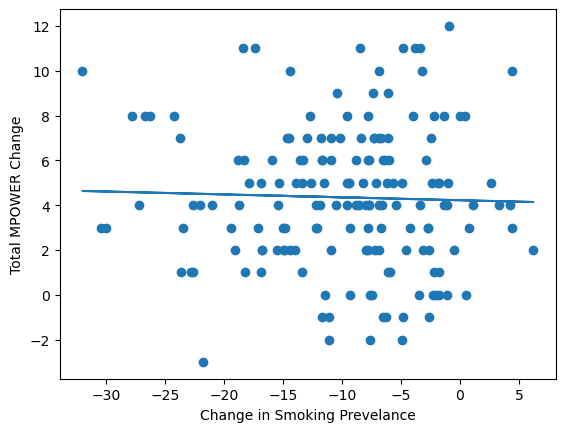

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

x = clean_merged_data["Change Rate"]
y = clean_merged_data["TOTAL MPOWER Change"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.xlabel("Change in Smoking Prevelance")
plt.ylabel("Total MPOWER Change")
plt.plot(x, mymodel)
plt.show()
